<a href="https://colab.research.google.com/github/anushadatar/split-ticket/blob/master/Prepare-Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleanup, Validation, and Resampling

This repository contains code for cleaning up and validating the ANES dataset for use in this project.

In [0]:
import pandas as pd
import numpy as np

# Load the datset.
For this analysis, I will be using the ANES (American National Elections Study) dataset. 

This dataset includes information from pre and post election surveys for voters from 1948 to 2016 - voters were interviewed both leading up to and following the election year the survey corresponds to. Each row in the dataframe corresponds to a dataset 

I got the data by creating an account on the ANES website and downloading the staa file (.dta). I then extracted the columns associated with my analysis, saved the new dataframe as a csv, and uploaded it to GitHub so that I can easily access it using Colab 

In [0]:
url = 'https://raw.githubusercontent.com/anushadatar/split-ticket/master/data/anes.csv'
anes = pd.read_csv(url)

In [5]:
anes

,Unnamed: 0,VCF0009z,VCF0004,VCF0706,VCF0707,VCF0708,VCF0301
0,0,1.000,1948.0,1. Democrat,NaN,NaN,NaN
1,1,1.000,1948.0,2. Republican,NaN,NaN,NaN
2,2,1.000,1948.0,1. Democrat,NaN,NaN,NaN
3,3,1.000,1948.0,2. Republican,NaN,NaN,NaN
4,4,1.000,1948.0,1. Democrat,NaN,NaN,NaN
...,...,...,...,...,...,...,...
59939,59939,0.837,2016.0,1. Democrat,NaN,NaN,1. Strong Democrat
59940,59940,1.310,2016.0,2. Republican,2. Republican,NaN,1. Strong Democrat
59941,59941,3.881,2016.0,NaN,NaN,NaN,2. Weak Democrat
59942,59942,1.192,2016.0,1. Democrat,1. Democrat,1. Democrat,1. Strong Democrat


In [6]:
anes.head()

,Unnamed: 0,VCF0009z,VCF0004,VCF0706,VCF0707,VCF0708,VCF0301
0,0,1.0,1948.0,1. Democrat,NaN,NaN,NaN
1,1,1.0,1948.0,2. Republican,NaN,NaN,NaN
2,2,1.0,1948.0,1. Democrat,NaN,NaN,NaN
3,3,1.0,1948.0,2. Republican,NaN,NaN,NaN
4,4,1.0,1948.0,1. Democrat,NaN,NaN,NaN


In [7]:
anes.tail()

,Unnamed: 0,VCF0009z,VCF0004,VCF0706,VCF0707,VCF0708,VCF0301
59939,59939,0.837,2016.0,1. Democrat,NaN,NaN,1. Strong Democrat
59940,59940,1.310,2016.0,2. Republican,2. Republican,NaN,1. Strong Democrat
59941,59941,3.881,2016.0,NaN,NaN,NaN,2. Weak Democrat
59942,59942,1.192,2016.0,1. Democrat,1. Democrat,1. Democrat,1. Strong Democrat
59943,59943,1.460,2016.0,NaN,NaN,NaN,6. Weak Republican


In [8]:
anes.shape

(59944, 7)

# Clean Up the Dataset

These numerical error codes refer to missing data.

All of the variables are categorical but they tend to have numerical error codes as such: 

‐1 = Inapplicable

‐2 = Text responses available in separate file or coded version will be included in future release

‐3 = Restricted

‐4 = Error

‐5 = Breakoff, sufficient partial IW

‐6 = No post‐election interview

‐7 = No post data, deleted due to incomplete IW

‐8 = Don’t know

‐9 = Refused

I spent quite a bit of time trying to explore this dataset and decode the cells with missing data and the associated error codes - this quickly became overly complicated, and involved a large set of individual changes that did not apply to the variables under study later in the project.

Eventually, I ended up just writing this function to apply on each column that I convert to numeric values that checks for negative variables and makes them into NaN. Referencing [Austin Veseliza's approach](https://github.com/AustinVes/Voter_Emotions/blob/master/main.ipynb) was very helpful here. I wrote functions for both the series and the dataset because the data is stored in categoricals by default, so for smaller commands I could just look at individual series. 


In [0]:
from pandas.api.types import is_numeric_dtype

def sanitize_series(series):
    """
    Turns missing data codes in Pandas series into NaN, and then returns 
    the pandas series.
    """
    return series.map(lambda n: n if (n > 0) else np.nan)

def sanitize_df(df):
    """
    Turns missing data codes in Pandas series into NaN, and then returns 
    the pandas series.
    """
    return df.applymap(lambda n: np.nan if (is_numeric_dtype(type(n)) and n < 0) else n)


For now, however, I will just run it on the entire dataset, which will take a minute but will facilitate validation.

In [0]:
anes = sanitize_df(anes)

# Explore the Dataset 
First I wanted to take a look at the extent of the dataset and look at some of the variables associated with the questions I am trying to answer.

## Years of Analysis
I took a look at the distribution of years of data collected.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5ad71cef0>]],
      dtype=object)

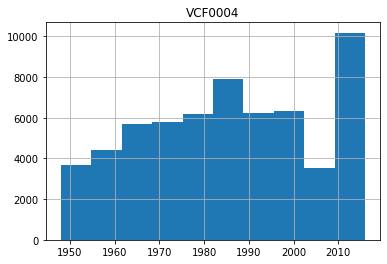

In [13]:
anes.hist(column = 'VCF0004')

## Variables for a single year
Let's start by taking a look at the results for a single year.

In [14]:
year_number = 2000
year_filter = anes['VCF0004'] == year_number
year = anes[year_filter]
year

,Unnamed: 0,VCF0009z,VCF0004,VCF0706,VCF0707,VCF0708,VCF0301
42908,42908,1.2886,2000.0,2. Republican,2. Republican,2. Republican,5. Independent - Republican
42909,42909,0.8959,2000.0,7. Did not vote or voted but not for president...,NaN,NaN,3. Independent - Democrat
42910,42910,1.0454,2000.0,1. Democrat,NaN,NaN,1. Strong Democrat
42911,42911,0.6005,2000.0,1. Democrat,1. Democrat,1. Democrat,3. Independent - Democrat
42912,42912,1.9270,2000.0,2. Republican,1. Democrat,1. Democrat,7. Strong Republican
...,...,...,...,...,...,...,...
44710,44710,0.8234,2000.0,1. Democrat,1. Democrat,1. Democrat,1. Strong Democrat
44711,44711,2.0407,2000.0,7. Did not vote or voted but not for president...,NaN,NaN,2. Weak Democrat
44712,44712,0.3717,2000.0,1. Democrat,NaN,NaN,1. Strong Democrat
44713,44713,1.5601,2000.0,7. Did not vote or voted but not for president...,NaN,NaN,2. Weak Democrat


### Presidential Vote

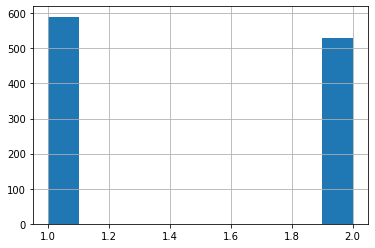

In [15]:
pres_vote = year["VCF0706"]
pres_vote
pres_vote_ints = pres_vote.map({'2. Republican': 2, '1. Democrat': 1, '3. Other (incl. 3d/minor party candidates and write-ins)': 3, '7. Did not vote or voted but not for president (exc.1972)': np.nan})
pres_vote_ints.dropna().hist()

### House Vote

In [16]:
house_vote = year["VCF0707"]
house_vote

42908    2. Republican
42909              NaN
42910              NaN
42911      1. Democrat
42912      1. Democrat
             ...      
44710      1. Democrat
44711              NaN
44712              NaN
44713              NaN
44714              NaN
Name: VCF0707, Length: 1807, dtype: object

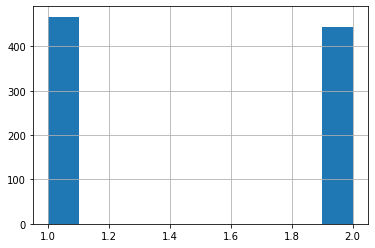

In [17]:
house_vote_ints = house_vote.map({'2. Republican': 2, '1. Democrat': 1})
house_vote_ints.dropna().hist()

## Senate Vote

In [18]:
senate_vote = year["VCF0708"]
senate_vote

42908    2. Republican
42909              NaN
42910              NaN
42911      1. Democrat
42912      1. Democrat
             ...      
44710      1. Democrat
44711              NaN
44712              NaN
44713              NaN
44714              NaN
Name: VCF0708, Length: 1807, dtype: object

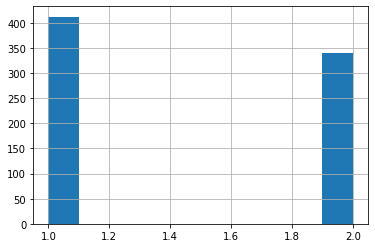

In [19]:
senate_vote_ints = senate_vote.map({'2. Republican': 2, '1. Democrat': 1})
senate_vote_ints.dropna().hist()

### Political View

In [22]:
views = year["VCF0301"]
views

42908    5. Independent - Republican
42909      3. Independent - Democrat
42910             1. Strong Democrat
42911      3. Independent - Democrat
42912           7. Strong Republican
                    ...             
44710             1. Strong Democrat
44711               2. Weak Democrat
44712             1. Strong Democrat
44713               2. Weak Democrat
44714               2. Weak Democrat
Name: VCF0301, Length: 1807, dtype: object

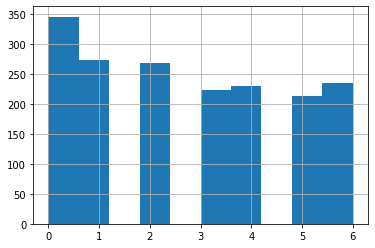

In [23]:
views_ints = views.map({'1. Strong Democrat' : 0,
                        '2. Weak Democrat' : 1,
                        '3. Independent - Democrat': 2,
                        '4. Independent - Independent': 3,
                        '5. Independent - Republican': 4,
                        '6. Weak Republican' : 5,
                        '7. Strong Republican' : 6})
views_ints.dropna().hist()

# Validate the Dataset
I'll take a look at a couple of specific values for specific years and compare them to the dataset codebook to ensure that the values I have match their documentation. I'll do this for multiple years (one general election and one midterm) to make sure things align across different scenarios. 

## 2000 Value Counts

I'll need to use the [cumulative codebook](https://electionstudies.org/wp-content/uploads/2018/12/anes_timeseries_cdf_codebook_var.pdf) to find the source variables for each of the variables under study, and then I can go to the codebook for the specific year to find the counts and check that they match my dataset.

For the year 2000, I am expecting the following outcomes:

President: Dem : 590, Rep: 530, Did not: 376, Other: 45

Senate: Dem: 412, Rep: 340

House: Dem: 467, Rep: 444

Views: 1. Strong Dem: 346, 2. Weak Democrat: 273, 3. Independent - Democrat: 269, 4. Independent - Independent: 224, 5. Independent - Republican: 230, 6. Weak Republican: 214, 7. Strong Republican: 236

In [24]:
pres_vote.value_counts()

1. Democrat                                                  590
2. Republican                                                530
7. Did not vote or voted but not for president (exc.1972)    376
4. Other (incl. 3d/minor party candidates and write-ins)      45
Name: VCF0706, dtype: int64

In [25]:
senate_vote.value_counts()

1. Democrat      412
2. Republican    340
Name: VCF0708, dtype: int64

In [26]:
house_vote.value_counts()

1. Democrat      467
2. Republican    444
Name: VCF0707, dtype: int64

In [27]:
views.value_counts()


1. Strong Democrat              346
2. Weak Democrat                273
3. Independent - Democrat       269
7. Strong Republican            236
5. Independent - Republican     230
4. Independent - Independent    224
6. Weak Republican              214
Name: VCF0301, dtype: int64

## Another Year
These match up, but I'll check another year. 
Here is one with no presidential election - 1966. I expect (according to the codebook)

For the year 1962, I am expecting the following outcomes:

President: Empty series, no election.

Senate: Dem: 388, Rep: 289

House: Dem: 155, Rep: 155

In [28]:
year_number = 1966
year_filter = anes['VCF0004'] == year_number
year = anes[year_filter]
pres_vote = year["VCF0706"]
house_vote = year["VCF0707"]
senate_vote = year["VCF0708"]
views = year["VCF0301"]


pres_vote.value_counts()

Series([], Name: VCF0706, dtype: int64)

In [29]:
house_vote.value_counts()

1. Democrat      388
2. Republican    289
Name: VCF0707, dtype: int64

In [30]:
senate_vote.value_counts()

2. Republican    155
1. Democrat      155
Name: VCF0708, dtype: int64

In [31]:
views.value_counts()

2. Weak Democrat                354
1. Strong Democrat              230
6. Weak Republican              194
4. Independent - Independent    157
7. Strong Republican            123
3. Independent - Democrat       115
5. Independent - Republican      90
Name: VCF0301, dtype: int64

As these match up, I feel comfortable using this data for analysis.

# Resampling
The last way to prepare the dataset is to account for the startified sampling of the data. Unfortunately, the weights are farily complicated to put in place for this dataset - not every year has weights associated with it, and there are different weight for different modes of administration used at different times. One thing to keep in mind is that the weights change by variable - different types have different weights, and the types vary by individual variable. Luckily, I can mainly stick to "Type 0" variables for my analysis here, and because I don't care about separating out the face to face and online sample (beyond just making sure that they are sampled correctly), I can use one weight variable for my analysis. Here's the [appendix](https://electionstudies.org/wp-content/uploads/2018/12/anes_timeseries_cdf_codebook_app.pdf) detailing more about how weighting works here. 

To confirm this, I'll resample the dataset and then check out one of the variables I just validated - I should expect to see a small delta in the values.  

In [0]:
n = len(anes)
weights = anes['VCF0009z']
sample = anes.sample(n, 
                     replace=True, 
                     weights=weights)


In [34]:
year_number = 1966
year_filter = sample['VCF0004'] == year_number
year = sample[year_filter]
pres_vote = year["VCF0706"]
house_vote = year["VCF0707"]
senate_vote = year["VCF0708"]
views = year["VCF0301"]


house_vote.value_counts()

1. Democrat      356
2. Republican    300
Name: VCF0707, dtype: int64

In [35]:
senate_vote.value_counts()

2. Republican    157
1. Democrat      134
Name: VCF0708, dtype: int64

As I do see a small change, I feel comfortable moving forward with my analysis as long as I do this resampling step. I do the rest of the work for this project in the [Analysis notebook](https://github.com/anushadatar/split-ticket/blob/master/Analysis.ipynb) . 